In [1]:
import pandas as pd
import os

meta_data = pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype.csv' )
subjects = os.listdir('/global/cfs/cdirs/m3898/2.UKB/1.sMRI_fs_cropped')
    
# meta_data.loc[subj,] for subj in subjects 

In [6]:
meta_data[meta_data['eid']==1000010]['age']

0    67.0
Name: age, dtype: float64

In [ ]:
[(subj,meta_data[meta_data['eid']==int(subj[:7])]['sex'].values[0]) for subj in subjects]

In [23]:
tup = (4,4,4)
def my(x,y,z,u):
    return x+y[0]+z+u

my(3,tup,2,2)

11

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

meta_data = pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype.csv' )
subjects = os.listdir('/global/cfs/cdirs/m3898/2.UKB/1.sMRI_fs_cropped')

eid                                     0
sex                                     1
age                                     1
income                             453909
SuicidalideationPassive            345149
SuicidalideationActive_Ever        345149
SuicidalideationActive_PastYear    479302
SelfHarmed_PastYear                495618
SuicideAttempt_Ever                495618
SuicideAttempt_PastYear            498925
BMI                                456103
FID                                 15210
IID                                 15210
SCORE_auto                          15210
fluid                              479903
dtype: int64

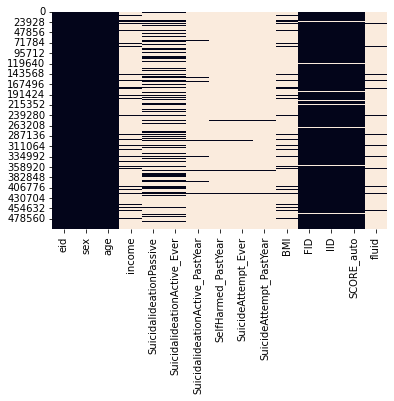

In [4]:
%matplotlib inline
GPS = pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_Intelligence_EUR_score_phiauto_SUM.txt',sep='\t' )
fluid_intelligence = pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/sub_T1_fluid.csv') 
meta_data = pd.merge(meta_data, GPS, left_on='eid', right_on = 'FID',how = 'left')
total = pd.merge(meta_data, fluid_intelligence, left_on='eid', right_on = 'eid',how = 'left')

sns.heatmap(total.isnull(), cbar=False)

total.isna().sum()

In [5]:
total

,eid,sex,age,income,SuicidalideationPassive,SuicidalideationActive_Ever,SuicidalideationActive_PastYear,SelfHarmed_PastYear,SuicideAttempt_Ever,SuicideAttempt_PastYear,BMI,FID,IID,SCORE_auto,fluid
0,1000010,0.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000010.0,1000010.0,-0.000002,NaN
1,1000028,0.0,46.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,1000028.0,1000028.0,0.000002,NaN
2,1000034,0.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000034.0,1000034.0,-0.000005,NaN
3,1000045,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000045.0,1000045.0,-0.000008,NaN
4,1000052,1.0,58.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,1000052.0,1000052.0,0.000002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502481,6025376,1.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502482,6025387,0.0,63.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,6025387.0,6025387.0,-0.000006,NaN
502483,6025391,1.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6025391.0,6025391.0,0.000006,NaN
502484,6025400,0.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6025400.0,6025400.0,-0.000003,NaN


In [6]:
total.to_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype_gps_included.csv')


# Total data

In [8]:
import pandas as pd
import os
import numpy as np
total= pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype_gps_included.csv')
subjects = os.listdir('/global/cfs/cdirs/m3898/2.UKB/1.sMRI_fs_cropped')

In [9]:
subj_meta = [meta_data[meta_data['eid']==int(subj[:7])]['sex'].values[0] for subj in subjects]

sex
0.0    22584
1.0    20210
dtype: int64

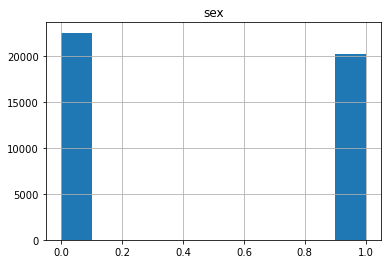

In [12]:
pd.DataFrame({'sex':subj_meta}).hist()
pd.DataFrame({'sex':subj_meta}).value_counts()

In [33]:
subj_meta = [meta_data[meta_data['eid']==int(subj[:7])]['age'].values[0] for subj in subjects]

In [34]:
pd.DataFrame({'age':subj_meta})['age']

0        65.0
1        61.0
2        51.0
3        51.0
4        62.0
         ... 
42789    58.0
42790    61.0
42791    64.0
42792    58.0
42793    53.0
Name: age, Length: 42794, dtype: float64

mean: 55.00280413142029 std: 7.54161630730662


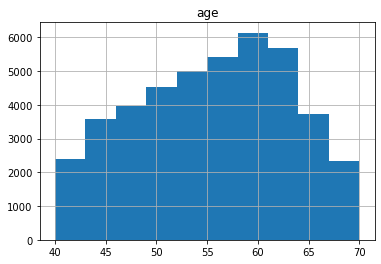

In [35]:
pd.DataFrame({'age':subj_meta}).hist()
pd.DataFrame({'age':subj_meta}).value_counts()
print('mean:',pd.DataFrame({'age':subj_meta}).mean().values[0],'std:',pd.DataFrame({'age':subj_meta}).std().values[0])


In [37]:
subj_meta = [total[total['eid']==int(subj[:7])]['SCORE_auto'].values[0] for subj in subjects]

41677

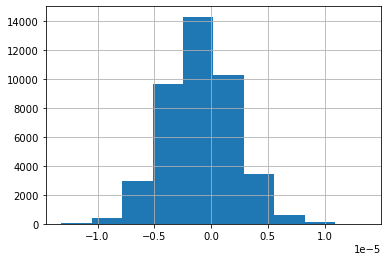

In [44]:
#io
#fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))

pd.DataFrame({'SCORE_auto':subj_meta})['SCORE_auto'].dropna().hist()
pd.DataFrame({'SCORE_auto':subj_meta})['SCORE_auto'].dropna().count()

# totala=total.dropna(subset=['SCORE_auto'])
# totala['SCORE_auto'].hist()
# totala['SCORE_auto'].std()

8.095189791325376

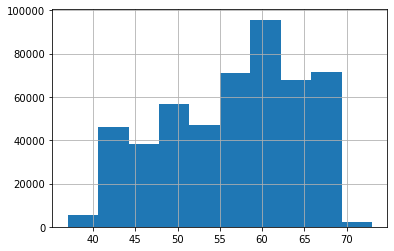

In [30]:
total['age'].hist()
total['age'].std()

<AxesSubplot:>

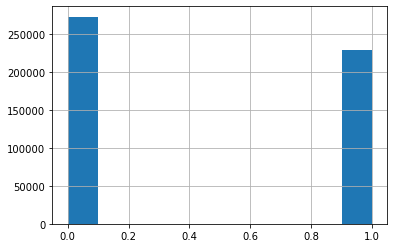

In [31]:
total['sex'].hist()

22583

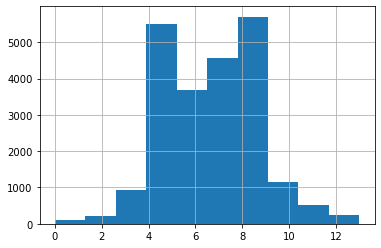

In [46]:
subj_meta = [total[total['eid']==int(subj[:7])]['fluid'].values[0] for subj in subjects]

pd.DataFrame({'fluid':subj_meta})['fluid'].dropna().hist()
pd.DataFrame({'fluid':subj_meta})['fluid'].dropna().count()


In [50]:
pd.DataFrame({'fluid':subj_meta}).mean()

fluid    6.638401
dtype: float64

In [51]:
pd.DataFrame({'fluid':subj_meta}).std()

fluid    2.034696
dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler



totala=total.dropna(subset=['fluid'])
# totala['fluid'].hist()
# totala['fluid'].std()

scaler = MinMaxScaler()
output = scaler.fit_transform(totala[['fluid']])

plt.hist(ouit)

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

### Intelligence gps

sigma ==5

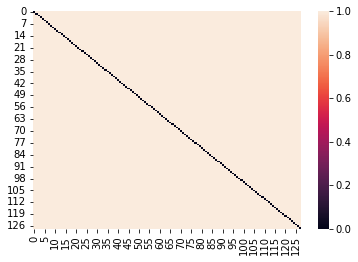

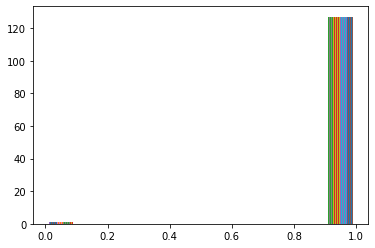

In [9]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
total= pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype_gps_included.csv')
total = total.dropna(subset=['SCORE_auto'])


all_labels = np.array(total['SCORE_auto'].to_list()[:64] * 2).reshape(-1,1)

weights = rbf_kernel(all_labels, all_labels, gamma=1./(2*5**2)) # [2N, 2N] # 0.000005
weights = weights * (1 - np.eye(2*64)) # puts 0 on the diagonal

sns.heatmap(weights)
plt.show()
plt.hist(weights)
plt.show()

sigma == 0.000005

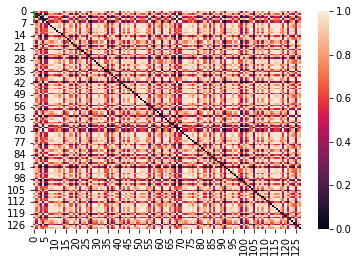

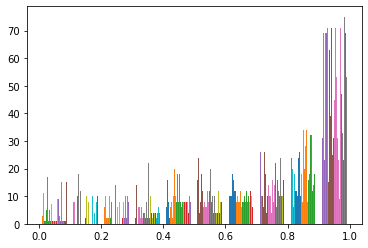

In [10]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
total= pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype_gps_included.csv')
total = total.dropna(subset=['SCORE_auto'])


all_labels = np.array(total['SCORE_auto'].to_list()[:64] * 2).reshape(-1,1)

weights = rbf_kernel(all_labels, all_labels, gamma=1./(2*0.000005**2)) # [2N, 2N] # 0.000005
weights = weights * (1 - np.eye(2*64)) # puts 0 on the diagonal
plt.hist(weights)

sns.heatmap(weights)
plt.show()
plt.hist(weights)
plt.show()

### Age

sigma == 5

In [4]:
# !pip install seaborn

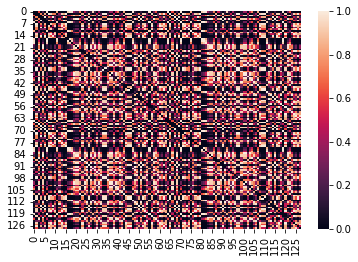

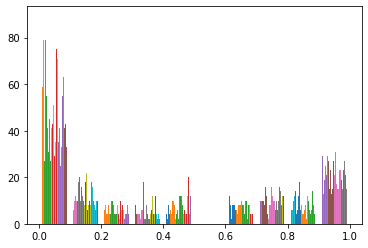

In [7]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
total= pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype_gps_included.csv')
total = total.dropna(subset=['age'])
all_labels = np.array(total['age'].to_list()[:64] * 2).reshape(-1,1)

weights = rbf_kernel(all_labels, all_labels, gamma=1./(2*5**2)) # [2N, 2N] #15
weights = weights * (1 - np.eye(2*64)) # puts 0 on the diagonal

sns.heatmap(weights)
plt.show()
plt.hist(weights)
plt.show()

sigma == 15

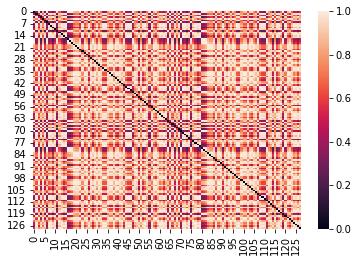

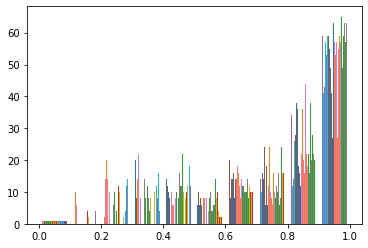

In [8]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
total= pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype_gps_included.csv')
total = total.dropna(subset=['age'])
all_labels = np.array(total['age'].to_list()[:64] * 2).reshape(-1,1)

weights = rbf_kernel(all_labels, all_labels, gamma=1./(2*15**2)) # [2N, 2N] #15
weights = weights * (1 - np.eye(2*64)) # puts 0 on the diagonal


sns.heatmap(weights)
plt.show()
plt.hist(weights)
plt.show()

### sex

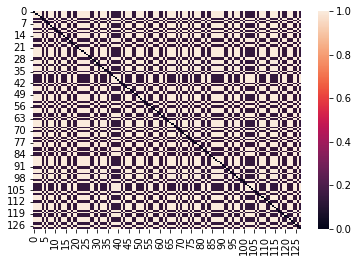

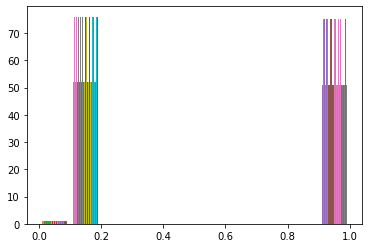

array([[0.        , 1.        , 1.        , ..., 0.13533528, 1.        ,
        0.13533528],
       [1.        , 0.        , 1.        , ..., 0.13533528, 1.        ,
        0.13533528],
       [1.        , 1.        , 0.        , ..., 0.13533528, 1.        ,
        0.13533528],
       ...,
       [0.13533528, 0.13533528, 0.13533528, ..., 0.        , 0.13533528,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.13533528, 0.        ,
        0.13533528],
       [0.13533528, 0.13533528, 0.13533528, ..., 1.        , 0.13533528,
        0.        ]])

In [25]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

total= pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype_gps_included.csv')
total = total.dropna(subset=['sex'])
all_labels = np.array(total['sex'].to_list()[:64] * 2).reshape(-1,1)

weights = rbf_kernel(all_labels, all_labels, gamma=1./(2*0.5**2)) # [2N, 2N] #15
weights = weights * (1 - np.eye(2*64)) # puts 0 on the diagonal
sns.heatmap(weights)
plt.show()
plt.hist(weights)
plt.show()
weights
# 커널의 sigma에 따라 값이 다르게 나옴.

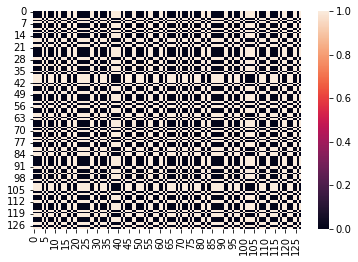

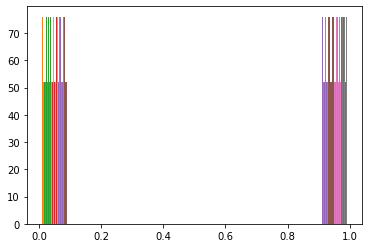

array([[0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 1., 1., 0., 1., 0.]])

In [27]:
# XOR로 구현하기

def XOR (a, b):
    assert len(a) == len(b)
    return np.array([[1 if i != j else 0 for i in a ] for j in b])
    
weights = XOR(all_labels, all_labels) # [2N, 2N] #15
weights = weights * (1 - np.eye(2*64)) # puts 0 on the diagonal
sns.heatmap(weights)
plt.show()
plt.hist(weights)
plt.show()
weights[:7,:7]    

In [94]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
total= pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype_gps_included.csv')
total = total.dropna(subset=['sex'])
all_labels = np.array(total['sex'].to_list()[:64] * 2).reshape(-1,1).astype(int)
all_labels @ all_labels.T
all_labels 

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
    

### Intelligence

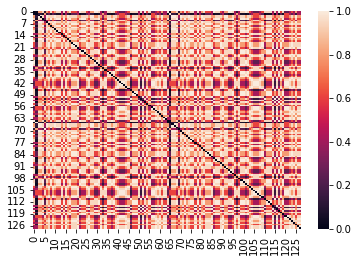

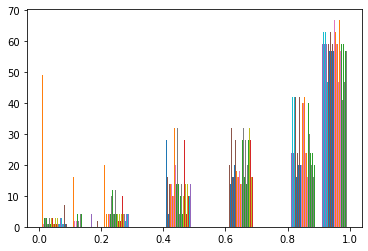

array([[0.        , 0.0285655 , 0.8007374 , ..., 0.8007374 , 0.41111229,
        0.41111229],
       [0.0285655 , 0.        , 0.13533528, ..., 0.13533528, 0.41111229,
        0.41111229],
       [0.8007374 , 0.13533528, 0.        , ..., 1.        , 0.8007374 ,
        0.8007374 ],
       ...,
       [0.8007374 , 0.13533528, 1.        , ..., 0.        , 0.8007374 ,
        0.8007374 ],
       [0.41111229, 0.41111229, 0.8007374 , ..., 0.8007374 , 0.        ,
        1.        ],
       [0.41111229, 0.41111229, 0.8007374 , ..., 0.8007374 , 1.        ,
        0.        ]])

In [2]:
from sklearn.metrics.pairwise import rbf_kernel
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

total= pd.read_csv('/global/cfs/cdirs/m3898/2.UKB/2.demo_qc/UKB_phenotype_gps_included.csv')
total = total.dropna(subset=['fluid'])
all_labels = np.array(total['fluid'].to_list()[:64] * 2).reshape(-1,1)

weights = rbf_kernel(all_labels, all_labels, gamma=1./(2*3**2)) # [2N, 2N] #15
weights = weights * (1 - np.eye(2*64)) # puts 0 on the diagonal
sns.heatmap(weights)
plt.show()
plt.hist(weights)
plt.show()
weights
# 커널의 sigma에 따라 값이 다르게 나옴.

In [4]:
import torch
import torch.nn.functional as func
z_i = torch.randn(3,5)
z_j = torch.randn(3,5)

In [8]:
sim_zii

tensor([[-1.0000e+08, -2.2783e+00, -3.1813e+00],
        [-2.2783e+00, -1.0000e+08, -6.5691e+00],
        [-3.1813e+00, -6.5691e+00, -1.0000e+08]])

In [9]:
sim_zjj

tensor([[-1.0000e+08,  3.4303e+00, -1.8894e+00],
        [ 3.4303e+00, -1.0000e+08, -8.0800e+00],
        [-1.8894e+00, -8.0800e+00, -1.0000e+08]])

In [10]:
correct_pairs

tensor([0, 1, 2])

In [26]:
func.log_softmax((torch.cat([sim_zij, sim_zii], dim=1)),dim=0).sum()

tensor(-3.0000e+08)

In [29]:
torch.cat([sim_zij, sim_zii], dim=1)

tensor([[-7.2409e-01,  1.7169e+00, -2.3098e+00, -1.0000e+08, -2.2783e+00,
         -3.1813e+00],
        [-7.0058e+00, -6.1946e+00,  1.5273e+00, -2.2783e+00, -1.0000e+08,
         -6.5691e+00],
        [ 6.0303e+00,  9.1974e-01,  3.8624e+00, -3.1813e+00, -6.5691e+00,
         -1.0000e+08]])

In [36]:
torch.log(torch.exp(torch.tensor([-7.2409e-01,-6.1946e+00,3.8624e+00]))/torch.exp(torch.cat([sim_zij, sim_zii], dim=1)).sum()).sum()

tensor(-21.5587)

In [11]:
func.cross_entropy(torch.cat([sim_zij, sim_zii], dim=1), correct_pairs)

tensor(4.1968)

In [51]:
INF = 1e8

N = len(z_i)
z_i = func.normalize(z_i, p=2, dim=-1) # dim [N, D]
z_j = func.normalize(z_j, p=2, dim=-1) # dim [N, D]
sim_zii= (z_i @ z_i.T) / temperature # dim [N, N] => Upper triangle contains incorrect pairs
sim_zjj = (z_j @ z_j.T) / temperature # dim [N, N] => Upper triangle contains incorrect pairs
sim_zij = (z_i @ z_j.T) / temperature # dim [N, N] => the diag contains the correct pairs (i,j) (x transforms via T_i and T_j)
# 'Remove' the diag terms by penalizing it (exp(-inf) = 0)
sim_zii = sim_zii - INF * torch.eye(N, device=z_i.device)
sim_zjj = sim_zjj - INF * torch.eye(N, device=z_i.device)

correct_pairs = torch.arange(N, device=z_i.device).long()
loss_i = func.cross_entropy(torch.cat([sim_zij, sim_zii], dim=1), correct_pairs)
loss_j = func.cross_entropy(torch.cat([sim_zij.T, sim_zjj], dim=1), correct_pairs)

In [52]:
torch.log(torch.cat([sim_zij, sim_zii], dim=1))

tensor([[    nan,  0.5405,     nan,     nan,     nan,     nan],
        [    nan,     nan,  0.4235,     nan,     nan,     nan],
        [ 1.7968, -0.0837,  1.3513,     nan,     nan,     nan]])

In [47]:

func.cross_entropy(torch.cat([sim_zij, sim_zii], dim=1), correct_pairs)

tensor(4.1968)

In [45]:
torch.log(torch.cat([sim_zij, sim_zii], dim=1))

tensor([[    nan,  0.5405,     nan,     nan,     nan,     nan],
        [    nan,     nan,  0.4235,     nan,     nan,     nan],
        [ 1.7968, -0.0837,  1.3513,     nan,     nan,     nan]])

In [41]:
kernel = lambda y1, y2: rbf_kernel(y1, y2, gamma=1./(2*self.sigma**2))

z_i = func.normalize(z_i, p=2, dim=-1) # dim [N, D]
z_j = func.normalize(z_j, p=2, dim=-1) # dim [N, D]
sim_zii= (z_i @ z_i.T) / temperature # dim [N, N] => Upper triangle contains incorrect pairs
sim_zjj = (z_j @ z_j.T) / temperature # dim [N, N] => Upper triangle contains incorrect pairs
sim_zij = (z_i @ z_j.T) / temperature # dim [N, N] => the diag contains the correct pairs (i,j) (x transforms via T_i and T_j)
# 'Remove' the diag terms by penalizing it (exp(-inf) = 0)
sim_zii = sim_zii - INF * torch.eye(N, device=z_i.device)
sim_zjj = sim_zjj - INF * torch.eye(N, device=z_i.device)

# all_labels = labels.view(N, -1).repeat(2, 1).detach().cpu().numpy() # [2N, *]
# weights = kernel(all_labels, all_labels) # [2N, 2N]
# weights = weights * (1 - np.eye(2*N)) # puts 0 on the diagonal
# weights /= weights.sum(axis=1)
# if 'rbf' kernel and sigma->0, we retrieve the classical NTXenLoss (without labels)


sim_Z = torch.cat([torch.cat([sim_zii, sim_zij], dim=1), torch.cat([sim_zij.T, sim_zjj], dim=1)], dim=0) # [2N, 2N]
log_sim_Z = func.log_softmax(sim_Z, dim=1)

#loss = -1./N * (torch.from_numpy(weights).to(z_i.device) * log_sim_Z).sum()

#correct_pairs = torch.arange(N, device=z_i.device).long()

In [39]:
log_sim_Z

tensor([[-1.0000e+08, -4.1181e+00, -5.0211e+00, -2.5639e+00, -1.2290e-01,
         -4.1496e+00],
        [-3.8286e+00, -1.0000e+08, -8.1194e+00, -8.5561e+00, -7.7448e+00,
         -2.2924e-02],
        [-9.3254e+00, -1.2713e+01, -1.0000e+08, -1.1382e-01, -5.2244e+00,
         -2.2817e+00],
        [-6.8275e+00, -1.3109e+01, -7.3072e-02, -1.0000e+08, -2.6730e+00,
         -7.9928e+00],
        [-1.9458e+00, -9.8572e+00, -2.7429e+00, -2.3233e-01, -1.0000e+08,
         -1.1743e+01],
        [-6.2694e+00, -2.4322e+00, -9.7196e-02, -5.8490e+00, -1.2040e+01,
         -1.0000e+08]])

In [3]:
import argparse
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--label_name", type=str, default = 'age', choices= ['age', 'sex', 'intelligence_gps'], help="target meta info")
    args = parser.parse_args()

usage: ipykernel_launcher.py [-h] [--label_name {age,sex,intelligence_gps}]
ipykernel_launcher.py: error: unrecognized arguments: -f /tmp/jupyter-runtime-3e706b09-0ff0-4292-8d0a-e7edf51614fc/kernel-3e839b2f-e49f-4f54-bd08-79bcda22a4e7.json


SystemExit: 2

In [7]:
import argparse  

def main(filename_list, option_list):
    """
    메인 함수
    """
    print('Target File : {}'.format(filename_list))
    print('Optional : {}'.format(option_list))


def get_arguments():
    """
    argument를 파싱해서 가져옴
    """
    parser = argparse.ArgumentParser()
    parser.add_argument(nargs='+' ,help='Example) index.html', dest='filename')
    parser.add_argument('--optional', '-o', nargs='*', help='Example) save', default=[], dest='option')

    filename_list = parser.parse_args().filename
    option_list = parser.parse_args().option

    return filename_list, option_list


if __name__ == '__main__':
    filename_list, option_list = get_arguments()
    main(filename_list, option_list)

usage: ipykernel_launcher.py [-h] [--optional [OPTION [OPTION ...]]]
                             filename [filename ...]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2